In [ ]:
from collections import defaultdict
from tqdm import tqdm

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
import sys
sys.path.append("../../covid_p2p_simulation_pg2455/src")
sys.path.append("..")

In [ ]:
from ctt.data_loading.loader import ContactDataset
from covid19sim.utils import probas_to_risk_mapping, proba_to_risk_fn

In [ ]:
DATA_PATH = "/Users/nrahaman/Python/ctt/data/sim_v2_people-1000_days-30_init-0.048_seed-5_20200603-171306.zip"
dataset = ContactDataset(path=DATA_PATH, preload=True)


In [ ]:
samples = defaultdict(list)

for idx in tqdm(range(len(dataset))):
    sample = dataset[idx]
    for key in sample:
        samples[key].append(sample[key])

In [6]:
for key in samples:
    if key.startswith("encounter"):
        continue
    samples[key] = torch.stack(samples[key]).numpy()

In [7]:
def filter_thresh(x, thresh=0.):
    x = np.asarray(x)
    x = x[x > thresh]
    return x

In [8]:
all_messages = torch.cat([msg[:, 0] for msg in samples["encounter_message"]]).numpy()

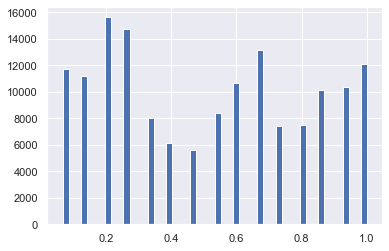

In [9]:
plt.figure()
plt.hist(filter_thresh(all_messages), bins=50)
plt.show()

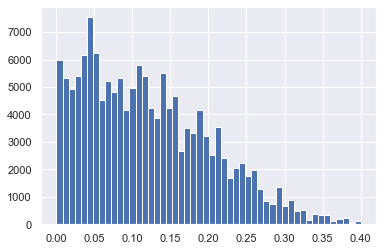

In [10]:
plt.figure()
plt.hist(filter_thresh(samples["infectiousness_history"][:, :, 0]), bins=50)
plt.show()

In [19]:
filter_thresh(samples["infectiousness_history"][:, :, 0]).shape

(189292,)

In [23]:
risk_mapping = probas_to_risk_mapping(filter_thresh(samples["infectiousness_history"][:, :, 0]), 16)
mappy = proba_to_risk_fn(risk_mapping)

In [28]:
risk_mapping.tolist()

[0.0,
 0.023176854476332664,
 0.035940684378147125,
 0.04723893851041794,
 0.0599491223692894,
 0.07240188866853714,
 0.08625195920467377,
 0.0984979197382927,
 0.11371604353189468,
 0.1318412870168686,
 0.14887279272079468,
 0.16652454435825348,
 0.18780438601970673,
 0.2103663682937622,
 0.2389608770608902,
 0.2778235077857971,
 1.0]

In [24]:
risk_levels = mappy(filter_thresh(samples["infectiousness_history"][:, :, 0]))

In [26]:
np.bincount(risk_levels)

array([11848, 11816, 11836, 11828, 11868, 11804, 11844, 11828, 11832,
       11808, 11860, 11832, 11800, 11836, 11824, 11828])

In [16]:
np.percentile(filter_thresh(samples["infectiousness_history"][:, :, 0]), 1)

0.004568646661937237

In [8]:
valid_encounter_messages = [msg for msg in samples["encounter_message"] if msg.numel() > 0]

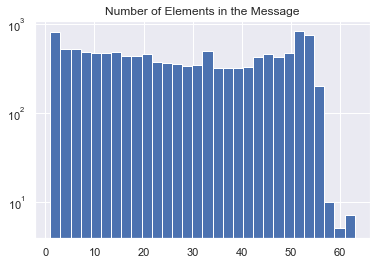

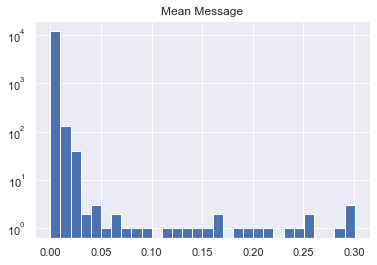

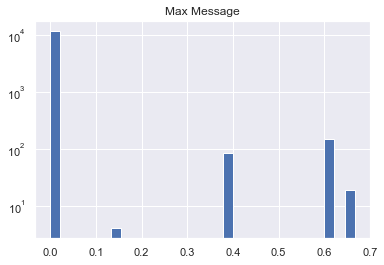

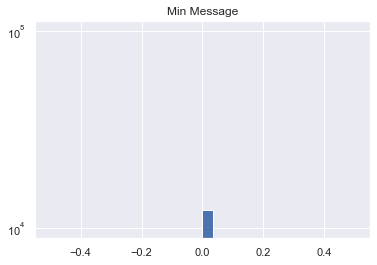

In [9]:
plt.figure()
plt.title("Number of Elements in the Message")
plt.hist([msg.numel() for msg in valid_encounter_messages], bins=30, log=True)
plt.show()

plt.figure()
plt.title("Mean Message")
plt.hist(([msg.mean().item() for msg in valid_encounter_messages]),
         bins=30, log=True)
plt.show()

plt.figure()
plt.title("Max Message")
plt.hist([msg.max().item() for msg in valid_encounter_messages], bins=30, log=True)
plt.show()

plt.figure()
plt.title("Min Message")
plt.hist([msg.min().item() for msg in valid_encounter_messages], bins=30, log=True)
plt.show()


In [10]:
infectiousness_and_max_message = [(samples["infectiousness_history"][idx, :, 0].max(),
                                   samples["encounter_message"][idx].max().item())
                                  for idx in range(len(samples["encounter_message"]))
                                  if samples["encounter_message"][idx].numel() > 0]

infectiousness, max_message = zip(*infectiousness_and_max_message)
infectiousness, max_message = np.asarray(infectiousness), np.asarray(max_message)

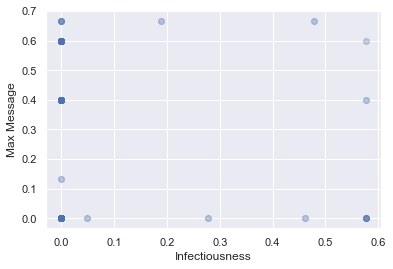

In [11]:
plt.figure()
plt.scatter(infectiousness, max_message, alpha=0.1)
plt.xlabel("Infectiousness")
plt.ylabel("Max Message")
plt.show()

In [12]:
contagions_and_messages = [(samples["encounter_is_contagion"][idx][:, 0],
                            samples["encounter_message"][idx][:, 0])
                           for idx in range(len(samples["encounter_is_contagion"]))
                           if samples["encounter_is_contagion"][idx].numel() > 0]

contagions, messages = zip(*contagions_and_messages)
contagions, messages = torch.cat(contagions), torch.cat(messages)

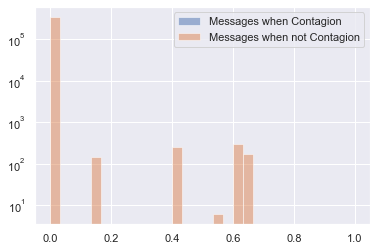

In [13]:
plt.figure()
plt.hist(messages[contagions == 1], log=True, bins=20, alpha=0.5, label="Messages when Contagion")
plt.hist(messages[contagions == 0], log=True, bins=20, alpha=0.5, label="Messages when not Contagion")
plt.legend()
plt.show()

In [28]:
samples["health_history"][:, 0, :-1].shape

# import os
# os.path.basename(PATH)

2940.0